Epoch 1/100
413/413 [==============================] - 1s 2ms/step - loss: 29344139264.0000 - val_loss: 6206470144.0000
Epoch 2/100
413/413 [==============================] - 1s 2ms/step - loss: 5489021952.0000 - val_loss: 4911246336.0000
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 4794741248.0000 - val_loss: 4520348672.0000
Epoch 4/100
413/413 [==============================] - 1s 2ms/step - loss: 4550022144.0000 - val_loss: 4314491392.0000
Epoch 5/100
413/413 [==============================] - 1s 2ms/step - loss: 4347007488.0000 - val_loss: 4160881664.0000
Epoch 6/100
413/413 [==============================] - 1s 2ms/step - loss: 4257626880.0000 - val_loss: 4047097088.0000
Epoch 7/100
413/413 [==============================] - 1s 2ms/step - loss: 4141020928.0000 - val_loss: 3974338560.0000
Epoch 8/100
413/413 [==============================] - 1s 2ms/step - loss: 4101410816.0000 - val_loss: 3896326400.0000
Epoch 9/100
413/413 [==========================

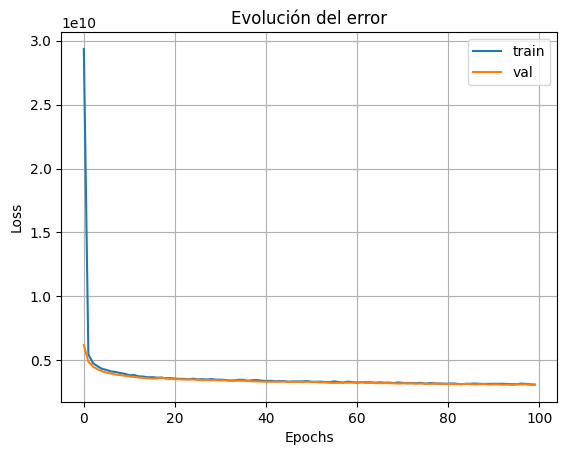

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from preprocessing import get_preprocessor
from tensorflow import keras
import matplotlib.pyplot as plt

# Cargar datos
housing = pd.read_csv("housing.csv")

# Separar X e y
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"].copy()

# División
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Preprocesamiento avanzado
preprocessor = get_preprocessor(housing)
X_train_prep = preprocessor.fit_transform(X_train)
X_valid_prep = preprocessor.transform(X_valid)
X_test_prep = preprocessor.transform(X_test)

# Modelo con capas densas, regularización y optimizador ajustado
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train_prep.shape[1]),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

# EarlyStopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Entrenamiento
history = model.fit(X_train_prep, y_train, epochs=100,
                    validation_data=(X_valid_prep, y_valid),
                    callbacks=[early_stopping_cb])

# Evaluación en validación
y_valid_pred = model.predict(X_valid_prep)
rmse_valid = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
print("✅ RMSE validación:", rmse_valid)

# Predicción sobre test
y_test_pred = model.predict(X_test_prep)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("✅ RMSE test:", rmse_test)

# Guardar predicciones
pd.DataFrame({
    "y_real": y_test,
    "y_pred": y_test_pred.flatten()
}).to_csv("predicciones_test.csv", index=False)

# Visualización
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.title("Evolución del error")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()
